## 데이터 확인하기 위한 파일 
### https://kaggle-kr.tistory.com/17

In [12]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')    # matplotlib의 기본 scheme 말고 seaborn schene를 세팅
sns.set(font_scale=2.5)     # 한 번에 크기 지정

import missingno as msno    # 결측치 시각화 라이브러리
# 경고 무시
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  # 노트북에서 바로 볼 수 있도록 함

UsageError: unrecognized arguments: # 노트북에서 바로 볼 수 있도록 함


In [13]:
# 데이터 지정
df_train = pd.read_csv('D:/kaggle/train.csv')
df_test = pd.read_csv('D:/kaggle/test.csv')

In [14]:
# 헤드 확인
df_train.head()

# passengerId 에 따른 feature들로 Survived를 맞춰야 함

PassengerId  Survived  Pclass              Name   Sex    Age  SibSp  Parch  \
0            0         1       1  Oconnor, Frankie  male    NaN      2      0   
1            1         0       3       Bryan, Drew  male    NaN      0      0   
2            2         0       3    Owens, Kenneth  male   0.33      1      2   
3            3         0       3     Kramer, James  male  19.00      0      0   
4            4         1       3     Bond, Michael  male  25.00      0      0   

      Ticket   Fare   Cabin Embarked  
0     209245  27.14  C12239        S  
1      27323  13.35     NaN        S  
2  CA 457703  71.29     NaN        S  
3   A. 10866  13.04     NaN        S  
4     427635   7.76     NaN        S

In [15]:
# feature 정리 및 확인

# PassengerId: 승객번호 train의 경우 0~99999까지 100000개가 있음
# Survived: 생존 여부 0 = No, 1 = Yes
# pclass: 티켓 클래스 1 = 1st, 2 = 2nd, 3 = 3rd (categorical feature)
# sex: 성별 male, female
# Age: 나이 
# SibSp: 함께 탑승한 형제와 배우자의 수
# Parch: 함께 탑승한 부모, 아이의 수
# Ticket: 티켓 번호 alphabat + integer
# Fare: 탑승료
# Cabin: 객실 번호
# Embarked: 탑승 항구  C = Cherbourg, Q = Queenstown, S = Southampton

# describe로 각 특성의 통계치 반환
df_train.describe()
# count 값이 passengerId개수인 십만개와 다르다면 null값임

PassengerId       Survived         Pclass           Age  \
count  100000.000000  100000.000000  100000.000000  96708.000000   
mean    49999.500000       0.427740       2.106910     38.355472   
std     28867.657797       0.494753       0.837727     18.313556   
min         0.000000       0.000000       1.000000      0.080000   
25%     24999.750000       0.000000       1.000000     25.000000   
50%     49999.500000       0.000000       2.000000     39.000000   
75%     74999.250000       1.000000       3.000000     53.000000   
max     99999.000000       1.000000       3.000000     87.000000   

               SibSp          Parch         Fare  
count  100000.000000  100000.000000  99866.00000  
mean        0.397690       0.454560     43.92933  
std         0.862566       0.950076     69.58882  
min         0.000000       0.000000      0.68000  
25%         0.000000       0.000000     10.04000  
50%         0.000000       0.000000     24.46000  
75%         1.000000       1.000000     33.50000  
max         8.000000       9.000000    744.66000

In [16]:
df_test.describe()
# count 값이 passengerId개수인 십만개와 다르다면 null값임

PassengerId         Pclass           Age          SibSp  \
count  100000.000000  100000.000000  96513.000000  100000.000000   
mean   149999.500000       2.368930     30.565796       0.486550   
std     28867.657797       0.878458     14.054634       0.771262   
min    100000.000000       1.000000      0.080000       0.000000   
25%    124999.750000       1.000000     21.000000       0.000000   
50%    149999.500000       3.000000     27.000000       0.000000   
75%    174999.250000       3.000000     40.000000       1.000000   
max    199999.000000       3.000000     81.000000       8.000000   

              Parch          Fare  
count  100000.00000  99867.000000  
mean        0.49283     45.374804  
std         0.92360     65.204725  
min         0.00000      0.050000  
25%         0.00000     10.130000  
50%         0.00000     13.980000  
75%         1.00000     37.390000  
max         9.00000    680.700000

### Null data check

In [23]:
# null값이 있으니 시각화 해서 보자
for col in df_train.columns:
    msg = 'column: {:>12}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column:  PassengerId	 Percent of NaN value: 0.00%
column:     Survived	 Percent of NaN value: 0.00%
column:       Pclass	 Percent of NaN value: 0.00%
column:         Name	 Percent of NaN value: 0.00%
column:          Sex	 Percent of NaN value: 0.00%
column:          Age	 Percent of NaN value: 3.29%
column:        SibSp	 Percent of NaN value: 0.00%
column:        Parch	 Percent of NaN value: 0.00%
column:       Ticket	 Percent of NaN value: 4.62%
column:         Fare	 Percent of NaN value: 0.13%
column:        Cabin	 Percent of NaN value: 67.87%
column:     Embarked	 Percent of NaN value: 0.25%


In [25]:
for col in df_test.columns:
    msg = 'column: {:>12}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column:  PassengerId	 Percent of NaN value: 0.00%
column:       Pclass	 Percent of NaN value: 0.00%
column:         Name	 Percent of NaN value: 0.00%
column:          Sex	 Percent of NaN value: 0.00%
column:          Age	 Percent of NaN value: 3.49%
column:        SibSp	 Percent of NaN value: 0.00%
column:        Parch	 Percent of NaN value: 0.00%
column:       Ticket	 Percent of NaN value: 5.18%
column:         Fare	 Percent of NaN value: 0.13%
column:        Cabin	 Percent of NaN value: 70.83%
column:     Embarked	 Percent of NaN value: 0.28%


<AxesSubplot:>

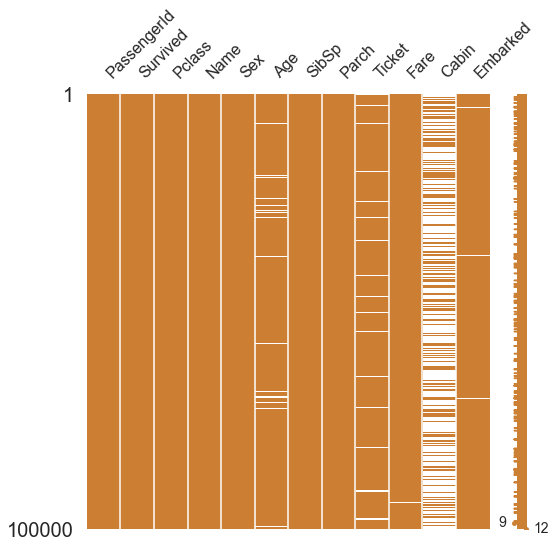

In [26]:
# 처음에 불러온 import missingno as msno 로 결측치를 시각화해서 더 쉽게 보자 
# matrix로
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

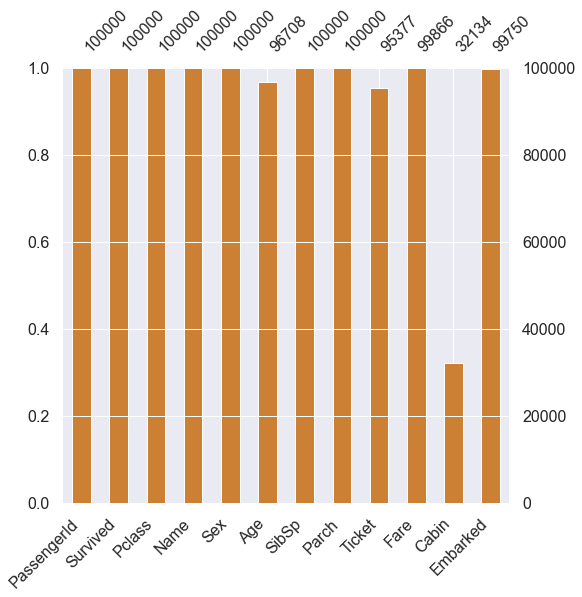

In [37]:
# bar로
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

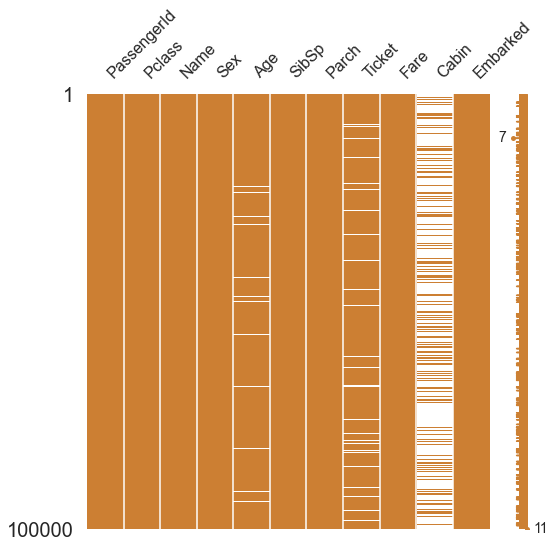

In [40]:
# test도 matrix로 확인
msno.matrix(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

### Target label 확인
target label이 어떤 분포를 갖고 있는지 확인, binary(0 or 1)의 경우 어떤 분표냐에 따라 모델의 평가 방법이 달라 질 수 있다.

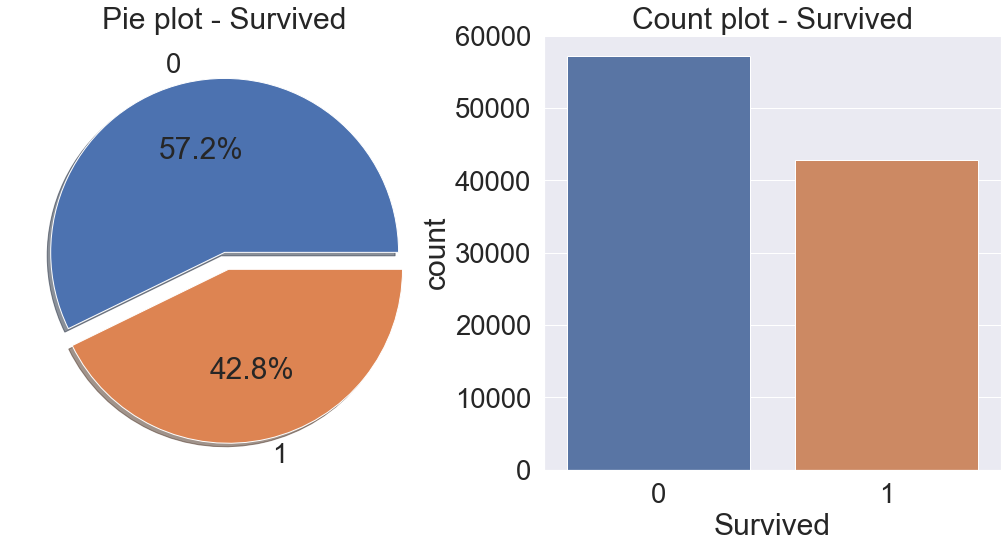

In [45]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 제법 균일한 모양~ 계속 진행!

## Exploratory data analysis
본격적인 데이터 분석
분석을 위한 시각화로는 matplotlib, seaborn, plotly 등을 쓰도록 함

PassengerId: 승객번호 train의 경우 0~99999까지 100000개가 있음

Survived: 생존 여부 0 = No, 1 = Yes

pclass: 티켓 클래스 1 = 1st, 2 = 2nd, 3 = 3rd (categorical feature)

sex: 성별 male, female

Age: 나이 

SibSp: 함께 탑승한 형제와 배우자의 수

Parch: 함께 탑승한 부모, 아이의 수

Ticket: 티켓 번호 alphabat + integer

Fare: 탑승료

Cabin: 객실 번호

Embarked: 탑승 항구  C = Cherbourg, Q = Queenstown, S = Southampton

## 1. pclass: 티켓 클래스 1 = 1st, 2 = 2nd, 3 = 3rd (categorical feature)


In [66]:
# .count()를 이용해서 pclass안의 survived가 총 몇인지 확인 (모두 합하면 십만이 나옴)
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

Survived
Pclass          
1          30315
2          28679
3          41006

In [49]:
# .sum() 을 이용해 0, 1 모두 더한 것, 결과적으로 1만 더해져서 생존자 수만 나옴
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

Survived
Pclass          
1          17576
2          15057
3          10141

In [50]:
# 이 과정을 crosstab으로 더 수월하게 볼 수 있음
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

# margins=True 총 합까지 보여줌

Survived
Pclass           
1       57.977899
2       52.501831
3       24.730527

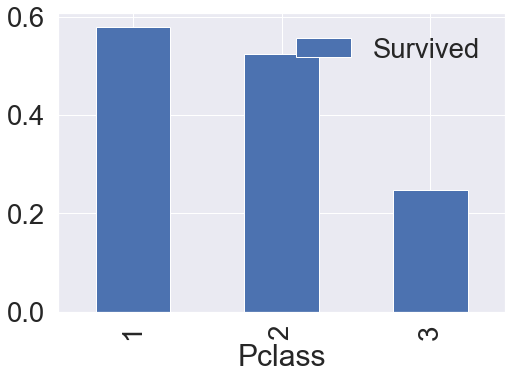

In [62]:
# grouped 객체에 .mead()을 이용해 각 클래스별 생존률을 얻어보자
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

# pclass가 높을 수록(1st) 생존률이 높은 것을 확인 가능

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()*100

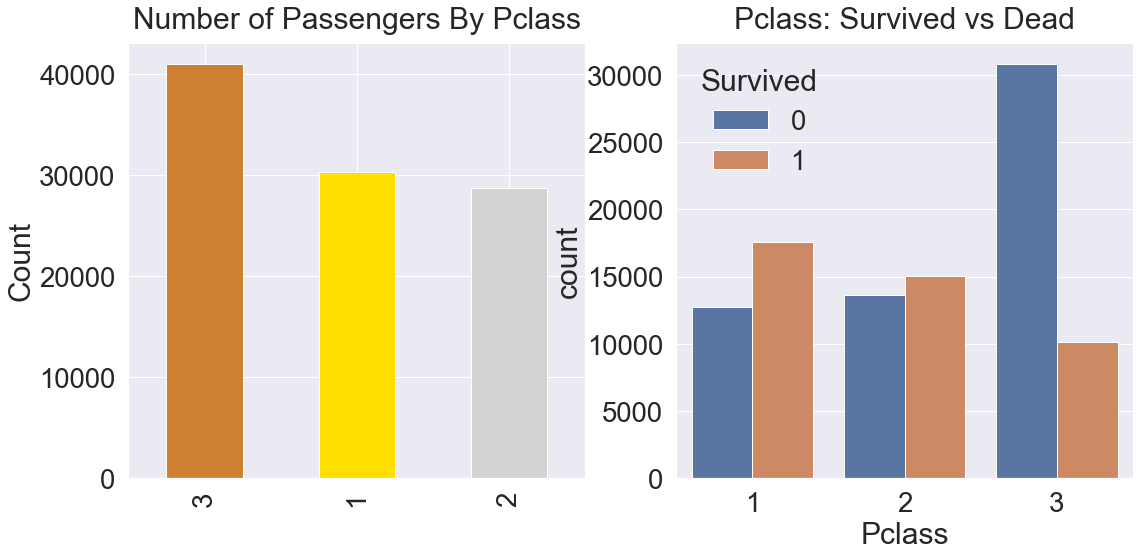

In [59]:
# seaborn과 countplot으로 더 자세한 표를 그려보자

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

# 결론적으로 pclass가 생존에 큰 영향을 미쳤다고 판단 가능

## 2. sex

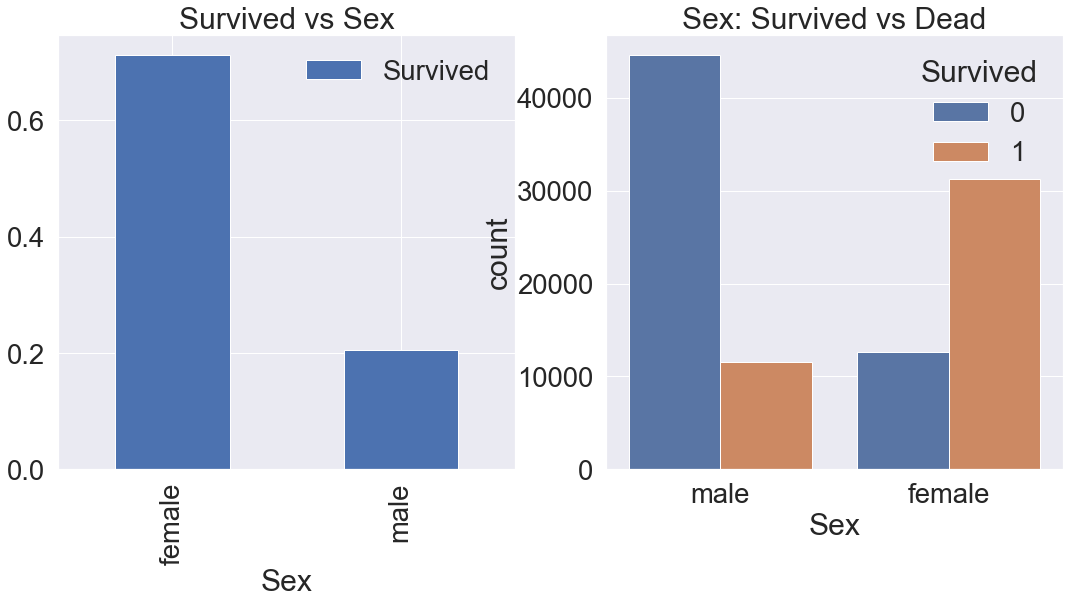

In [68]:
# 성별별 생존률을 살펴보자

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [72]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)*100

Survived
Sex              
female  71.152532
male    20.579535

In [74]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

# 결론적으로 여성일 때 생존할 확률이 더 높음

## 3. Both Sex and Pclass

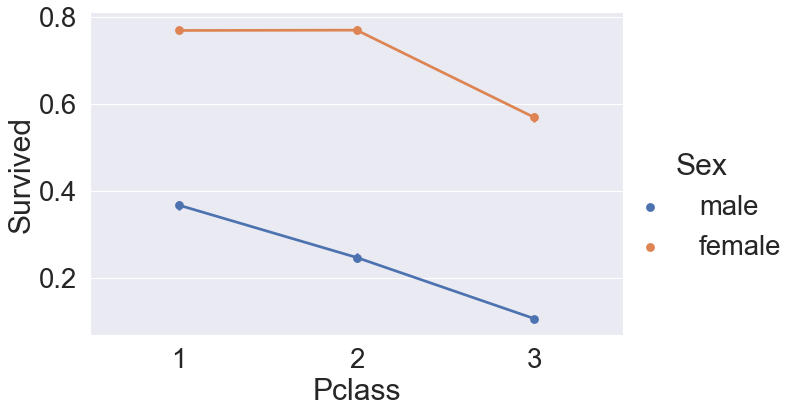

In [82]:
# 성별과 클래스에 관하여 생존이 어떻게 달라지는 지 확인해보자

sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

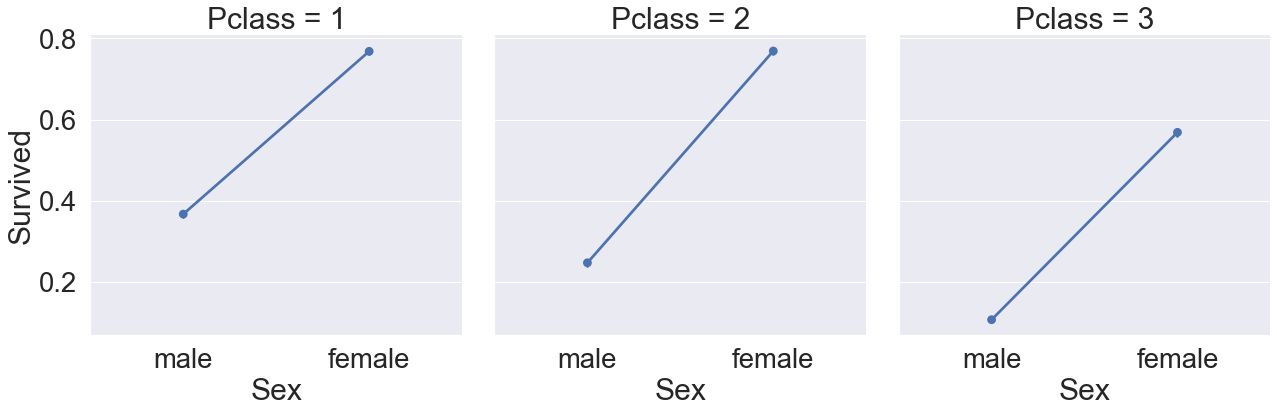

In [85]:
sns.factorplot(x = 'Sex', y = 'Survived', col='Pclass', data=df_train, satureation=.5, size=6, aspect=1)

# 모든 클래스에서 여성이 남성보다 생존률이 높다.
# 성별에 상관 없이 클래스가 높을 수록 살 확률이 높다.

## 4. Age

In [87]:
# 나이에 따른 생존률 확인

print('제일 나이 많은 탑습객 : {:.1f} 살'.format(df_train['Age'].max()))
print('제일 어린 탑습객 {:.1f} 살'.format(df_train['Age'].min()))
print('탑승객 평균 나이 {:.1f} 살'.format(df_train['Age'].mean()))

제일 나이 많은 탑습객 : 87.0 살
제일 어린 탑습객 0.1 살
탑승객 평균 나이 38.4 살


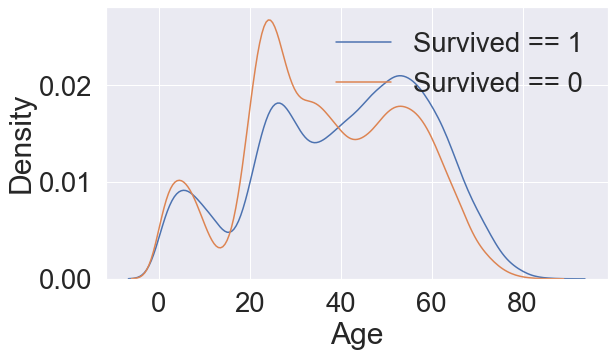

In [90]:
# 생존에 따른 age histogram을 그려보자

fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

# Kernel Density Estimation(커널 밀도 추정) = kde
# 어릴 수록 많이 죽고 40~부터 많이 살아남음

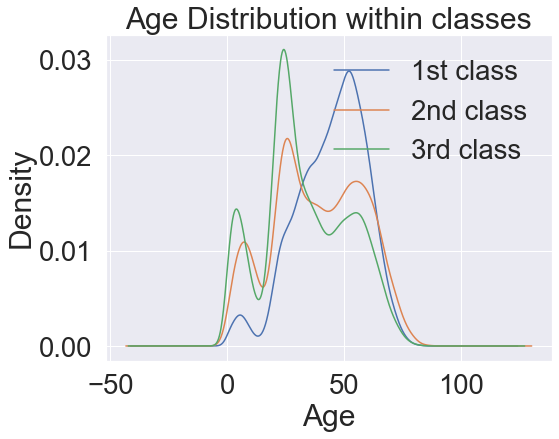

In [91]:
# 클래스에 따른 나이 분포 확인
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

# 높은 클래스일 수록 나이든 사람 비중이 커짐

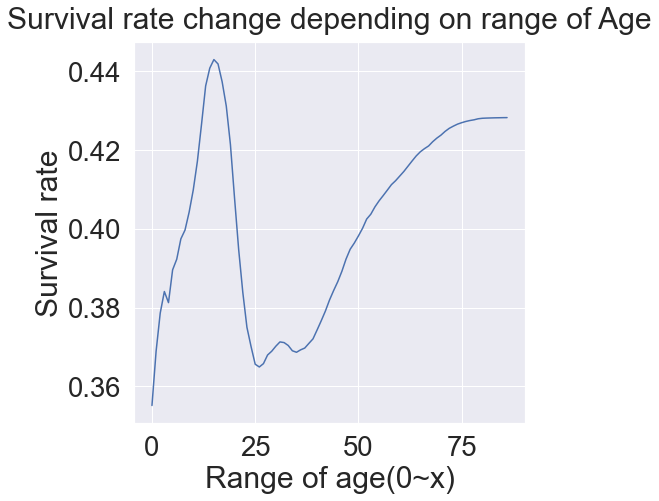

In [93]:
# 나이대에 따른 생존률 확인
cummulate_survival_ratio = []
for i in range(1, 88):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
# 각 나이별로 생존(0,1) 더한 것을 총 값으로 나눠줌

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of age(0~x)')
plt.show()

# 청소년과 노인의 생존률이 높다
# 중요한 feature로 사용

## 5. Pclass, Sex, Age

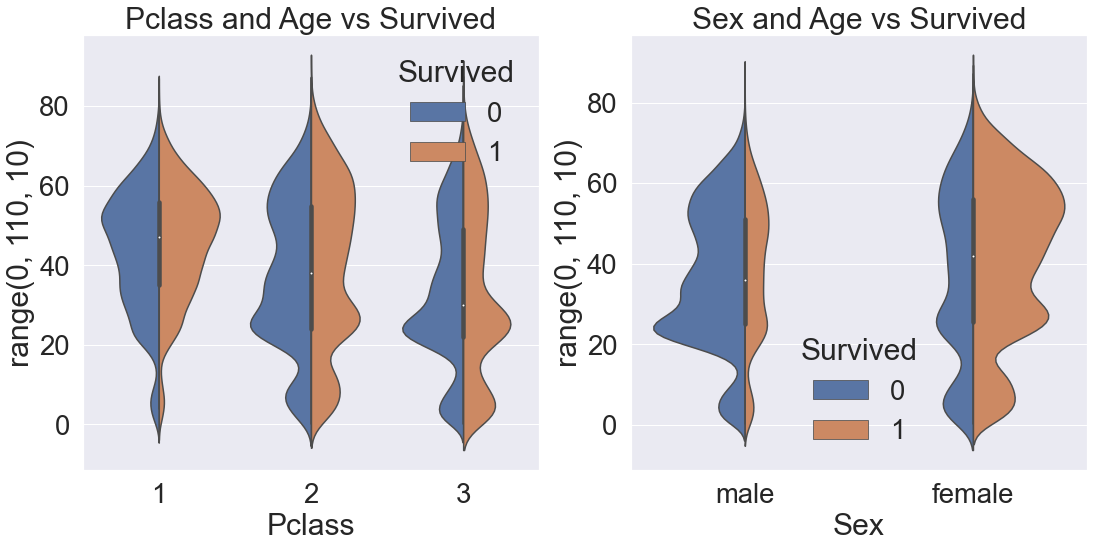

In [105]:
# 클래스, 성별, 나이에 대해 한번에 확인해보자
# violinplot을 사용해보자

f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, sclae='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_ylabel(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_ylabel(range(0, 110, 10))
plt.show()

# 여성노인과 어린이의 생존률이 높다.

## 6. Embarked
탑승했던 항구와 생존률의 상관관계 확인

Survived
Embarked           
S         31.529409
Q         59.697640
C         75.129580

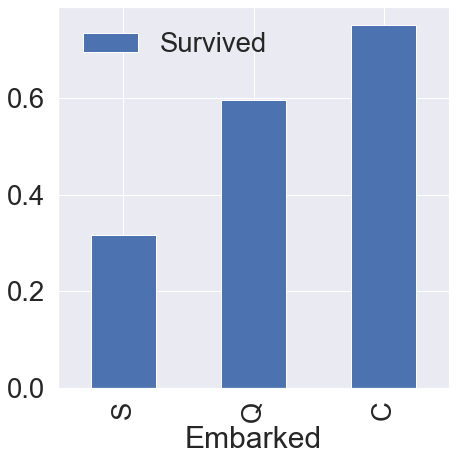

In [103]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=True).plot.bar(ax=ax)

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=True)*100

# 항구별 생존률 차이 확인

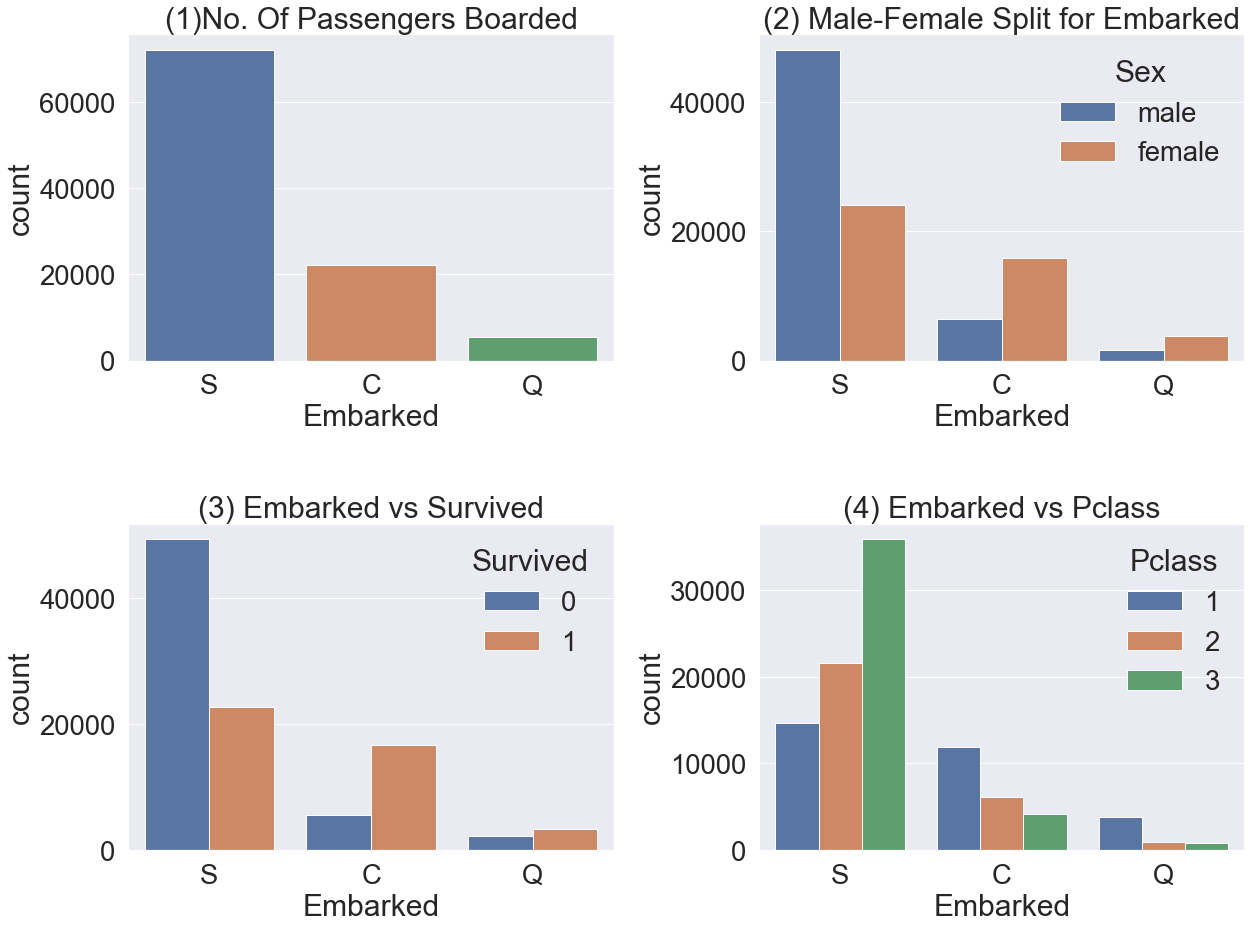

In [116]:
# 더 자세하게 살펴보자
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1)No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived',data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass',data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.3, hspace=0.5)     # 그래프 사이 간격 조정
plt.show()

# S 항구에서 가장 많은 사람이 탑승
# S 에는 남성이 더 많이 탑승
# S의 탑승객이 가장 많이 사망
# S에 class 3 가 많아 생존률이 더 낮음, 생존률이 가장 높은 C에 class 1 의 비율이 가장 높음

In [ ]:
## 7. 